In [1]:
import os
import pandas as pd
import numpy as np
from glob import glob

import pydicom

from matplotlib import pyplot as plt
import matplotlib.patches as patches

In [2]:
# data
data = pd.read_csv(r'C:\Users\3594997\Study\Kaggle\Pneumonia\stage\1\work_2.csv')
print(len(data))
data.head()

28989


,patientId,x,y,width,height,target,class,path,PatientAge,ViewPosition,PatientSex,NumBox
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,C:\Users\3594997\Study\Kaggle\Pneumonia\data\s...,51,PA,F,1
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,C:\Users\3594997\Study\Kaggle\Pneumonia\data\s...,48,PA,F,1
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,C:\Users\3594997\Study\Kaggle\Pneumonia\data\s...,19,AP,M,1
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,C:\Users\3594997\Study\Kaggle\Pneumonia\data\s...,28,PA,M,1
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,C:\Users\3594997\Study\Kaggle\Pneumonia\data\s...,32,AP,F,2


In [3]:
data.groupby('patientId').filter(lambda x:len(x)==4).head(10)

,patientId,x,y,width,height,target,class,path,PatientAge,ViewPosition,PatientSex,NumBox
823,0ab261f9-4eb5-42ab-a9a5-e918904d6356,613.0,352.0,106.0,102.0,1,Lung Opacity,C:\Users\3594997\Study\Kaggle\Pneumonia\data\s...,45,PA,F,4
824,0ab261f9-4eb5-42ab-a9a5-e918904d6356,266.0,644.0,135.0,146.0,1,Lung Opacity,C:\Users\3594997\Study\Kaggle\Pneumonia\data\s...,45,PA,F,4
825,0ab261f9-4eb5-42ab-a9a5-e918904d6356,545.0,452.0,215.0,125.0,1,Lung Opacity,C:\Users\3594997\Study\Kaggle\Pneumonia\data\s...,45,PA,F,4
826,0ab261f9-4eb5-42ab-a9a5-e918904d6356,722.0,558.0,88.0,88.0,1,Lung Opacity,C:\Users\3594997\Study\Kaggle\Pneumonia\data\s...,45,PA,F,4
1133,0d5bc737-03de-4bb8-98a1-45b7180c3e0f,342.0,157.0,148.0,113.0,1,Lung Opacity,C:\Users\3594997\Study\Kaggle\Pneumonia\data\s...,71,AP,M,4
1134,0d5bc737-03de-4bb8-98a1-45b7180c3e0f,633.0,128.0,90.0,195.0,1,Lung Opacity,C:\Users\3594997\Study\Kaggle\Pneumonia\data\s...,71,AP,M,4
1135,0d5bc737-03de-4bb8-98a1-45b7180c3e0f,655.0,478.0,163.0,141.0,1,Lung Opacity,C:\Users\3594997\Study\Kaggle\Pneumonia\data\s...,71,AP,M,4
1136,0d5bc737-03de-4bb8-98a1-45b7180c3e0f,214.0,374.0,193.0,251.0,1,Lung Opacity,C:\Users\3594997\Study\Kaggle\Pneumonia\data\s...,71,AP,M,4
1918,1bf08f3b-a273-4f51-bafa-b55ada2c23b5,322.0,327.0,116.0,119.0,1,Lung Opacity,C:\Users\3594997\Study\Kaggle\Pneumonia\data\s...,21,AP,F,4
1919,1bf08f3b-a273-4f51-bafa-b55ada2c23b5,340.0,564.0,108.0,137.0,1,Lung Opacity,C:\Users\3594997\Study\Kaggle\Pneumonia\data\s...,21,AP,F,4


In [4]:
# dictionary for box locations
boxes = {}

for _,row in data.iterrows():
    
    if row.target==1:
        patientId=row.patientId
        box=[int(row.x), int(row.y), int(row.width), int(row.height)]
        
        if patientId in boxes:
            boxes[patientId].append(box)
        else:
            boxes[patientId] = [box]

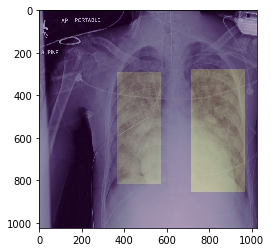

In [5]:
# plot image and all boxes
patientId='0d5bc737-03de-4bb8-98a1-45b7180c3e0f'
patientId='0ab261f9-4eb5-42ab-a9a5-e918904d6356'
patientId='1bf08f3b-a273-4f51-bafa-b55ada2c23b5'
patientId='00436515-870c-4b36-a041-de91049b9ab4'
patientId='01b9e362-4950-40f5-88fa-7557ac2a45bb'
#patientId='04a6aa6d-bd6d-48b1-822b-21b81c4bdf3a'
#patientId='aec75bea-7a4a-4ca6-8e82-bf3f05963c9d'

folder = r'C:\Users\3594997\Study\Kaggle\Pneumonia\data\stage_1_train_images'

image = pydicom.dcmread(os.path.join(folder, patientId+'.dcm')).pixel_array

if patientId in boxes:
    plt.imshow(image, cmap='bone')
    
    for box in boxes[patientId]:
        mask = np.zeros(image.shape)
        y, x, h, w = box
        mask[x:x+w, y:y+h] = 1
        plt.imshow(mask, alpha=0.2)

In [6]:
# Check if box cross middle line
data_box = data.loc[data.x.notnull()]
data_box.loc[(data_box.x<512) & (data_box.x+data_box.width>512)]
print(len(data_box))
print(len(data_box.loc[(data_box.x<512) & (data_box.x+data_box.width>512)]))

8964
748


In [7]:
temp = data_box.loc[(data_box.x<512) & (data_box.x+data_box.width>512)]
temp.groupby('patientId').filter(lambda x:len(x)>1)

,patientId,x,y,width,height,target,class,path,PatientAge,ViewPosition,PatientSex,NumBox
18559,aec75bea-7a4a-4ca6-8e82-bf3f05963c9d,253.0,23.0,329.0,214.0,1,Lung Opacity,C:\Users\3594997\Study\Kaggle\Pneumonia\data\s...,46,AP,M,3
18561,aec75bea-7a4a-4ca6-8e82-bf3f05963c9d,378.0,373.0,160.0,129.0,1,Lung Opacity,C:\Users\3594997\Study\Kaggle\Pneumonia\data\s...,46,AP,M,3
27498,f4362a52-b9f5-4d96-a6ba-04284a233eb0,325.0,347.0,215.0,257.0,1,Lung Opacity,C:\Users\3594997\Study\Kaggle\Pneumonia\data\s...,58,AP,F,3
27499,f4362a52-b9f5-4d96-a6ba-04284a233eb0,421.0,201.0,124.0,114.0,1,Lung Opacity,C:\Users\3594997\Study\Kaggle\Pneumonia\data\s...,58,AP,F,3


In [11]:
# explore metadata
metadata = pydicom.read_file(os.path.join(folder, patientId+'.dcm'), stop_before_pixels=True)
print(dir(metadata))
getattr(metadata, 'Modality')

['AccessionNumber', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'Columns', 'ConversionType', 'HighBit', 'InstanceNumber', 'LossyImageCompression', 'LossyImageCompressionMethod', 'Modality', 'PatientAge', 'PatientBirthDate', 'PatientID', 'PatientName', 'PatientOrientation', 'PatientSex', 'PhotometricInterpretation', 'PixelRepresentation', 'PixelSpacing', 'ReferringPhysicianName', 'Rows', 'SOPClassUID', 'SOPInstanceUID', 'SamplesPerPixel', 'SeriesDescription', 'SeriesInstanceUID', 'SeriesNumber', 'SpecificCharacterSet', 'StudyDate', 'StudyID', 'StudyInstanceUID', 'StudyTime', 'ViewPosition', '__contains__', '__delattr__', '__delitem__', '__dir__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__we

'CR'

In [9]:
dir(metadata)

['AccessionNumber',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'ConversionType',
 'HighBit',
 'InstanceNumber',
 'LossyImageCompression',
 'LossyImageCompressionMethod',
 'Modality',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientName',
 'PatientOrientation',
 'PatientSex',
 'PhotometricInterpretation',
 'PixelRepresentation',
 'PixelSpacing',
 'ReferringPhysicianName',
 'Rows',
 'SOPClassUID',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesDescription',
 'SeriesInstanceUID',
 'SeriesNumber',
 'SpecificCharacterSet',
 'StudyDate',
 'StudyID',
 'StudyInstanceUID',
 'StudyTime',
 'ViewPosition',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__set